In [23]:
# Importation des bibliothèques principaless
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des fonctions de manipulation des données
from sklearn.datasets import load_diabetes, load_iris, make_blobs, load_digits, make_moons
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, Binarizer, KBinsDiscretizer
from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, SelectFromModel, RFE, RFECV
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest, VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.decomposition import PCA


# Importation des métriques
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, median_absolute_error

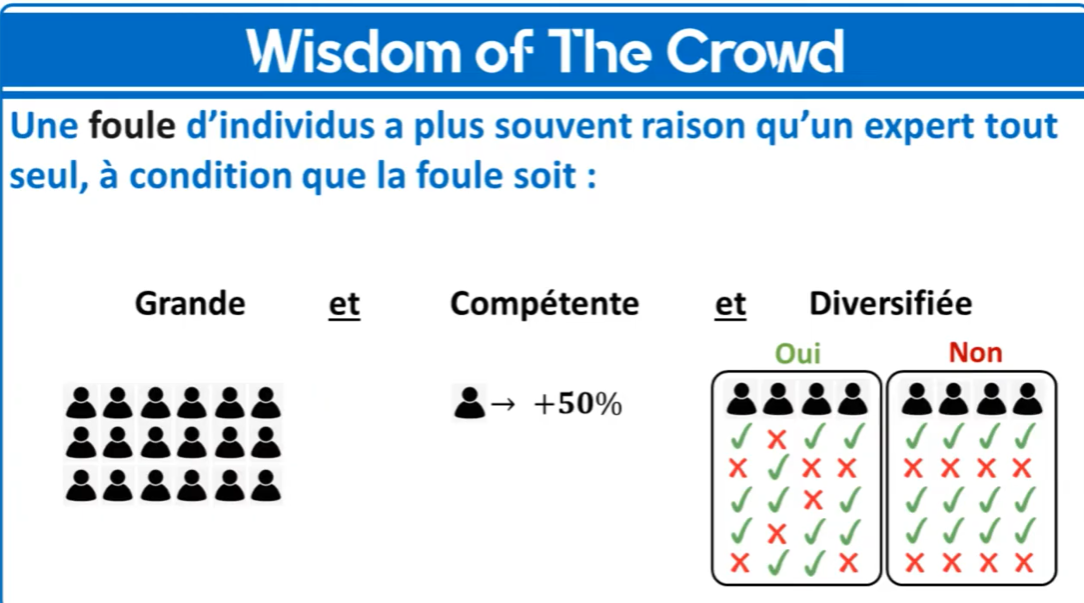

# Bagging, Boosting et Stacking

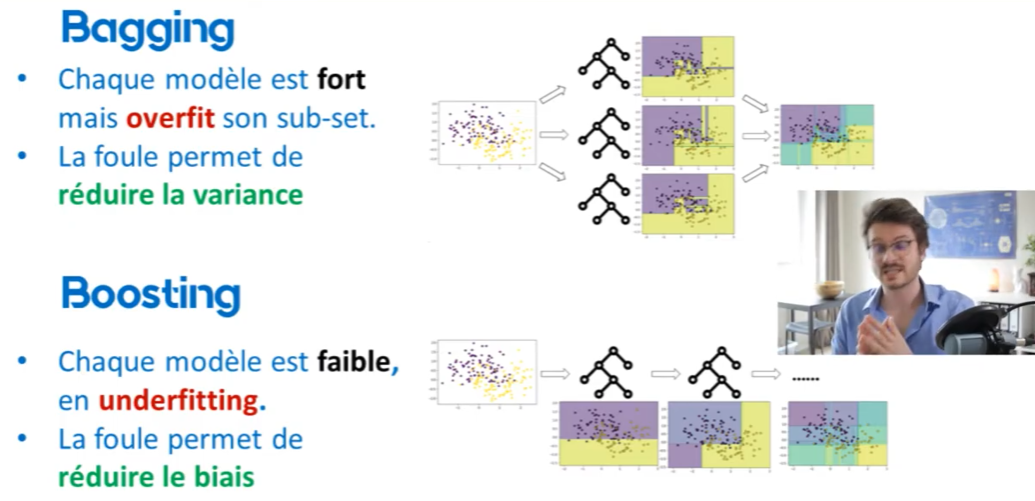



#### Voting Classifier
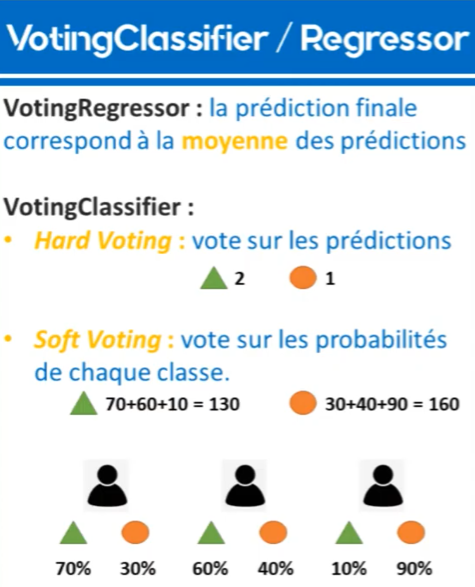

In [ ]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

In [ ]:
#création d'un train-test split
import test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [13]:
model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)
model_4 = VotingClassifier(estimators=[('SGD', model_1), ('Tree', model_2), ('KNN', model_3)], voting="hard")
for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, "score:", model.score(X_test, y_test))

SGDClassifier score: 0.84
DecisionTreeClassifier score: 0.86
KNeighborsClassifier score: 0.86
VotingClassifier score: 0.8733333333333333


## Bagging
Pour obtenir de meilleurs résultats, utiliser gridsearchcv

A utiliser lorsque le modèle a tendance à overfiting

In [19]:
model = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)
#Pour le random forest, on utilise le modèle RandomForestClassifier sans bagging car il est déjà implémenté dans le modèle.
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8933333333333333

## Boosting
Pour obtenir de meilleurs résultats, utiliser gridsearchcv

Utiliser si underfiting, faibles result 

In [22]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8733333333333333

## Stacking
Pour obtenir de meilleurs résultats, utiliser gridsearchcv

A utiliser si les modèles sont très forts individuellementg (des millions d'itérations)

Enormément d'arbres dans la forêt

La plus lente

In [26]:
from turtle import mode


model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)
model_4 = StackingClassifier(estimators=[('SGD', model_1), ('Tree', model_2), ('KNN', model_3)], final_estimator=KNeighborsClassifier())

model_4.fit(X_train, y_train)
model_4.score(X_test, y_test)


0.8666666666666667